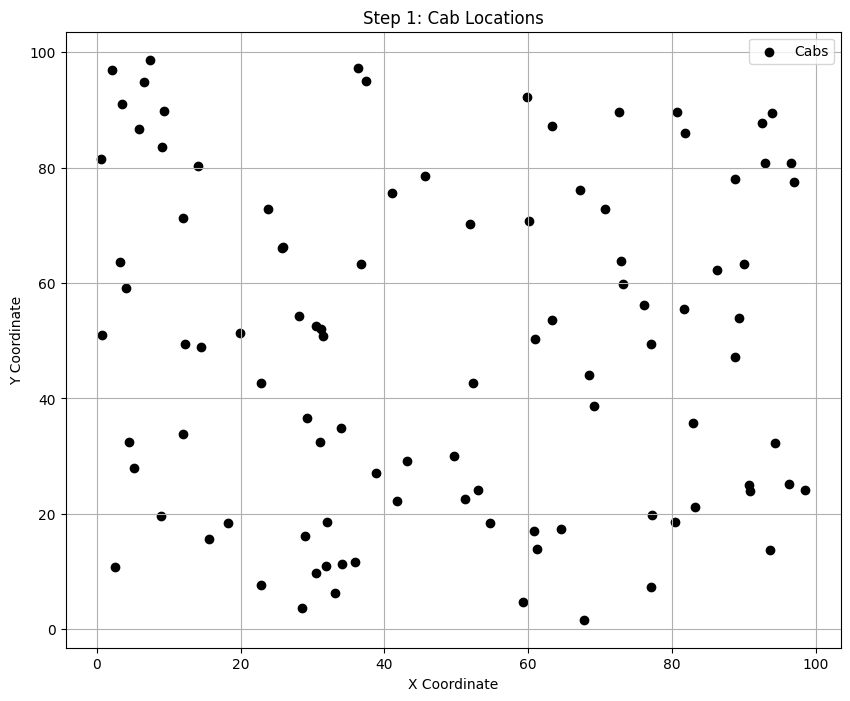

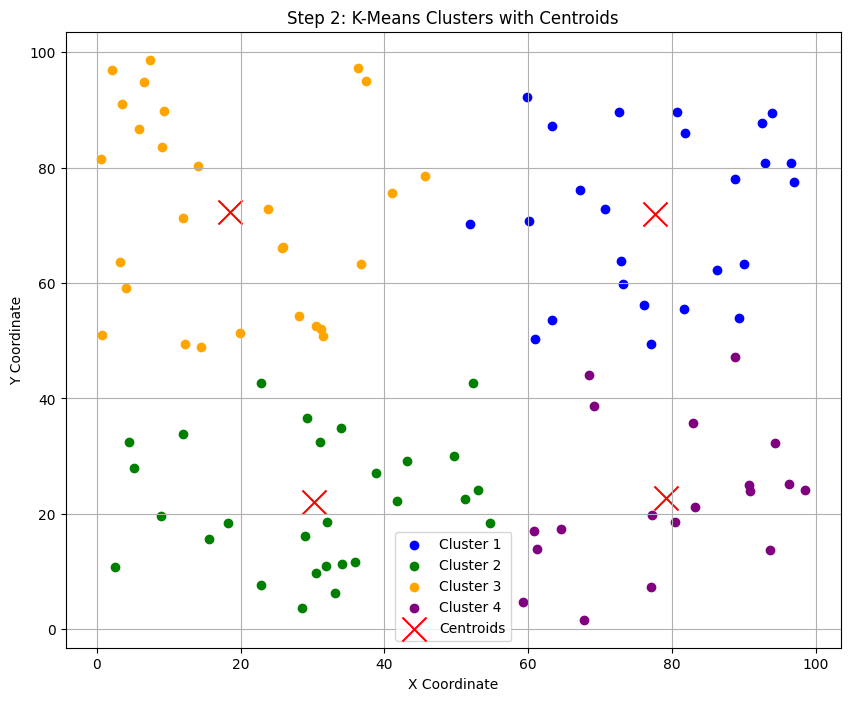

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Generate random cab locations
np.random.seed(42)
n_cabs = 100
cab_locations = np.random.rand(n_cabs, 2) * 100  # Random (x, y) points between 0 and 100

# Step 2: Plot initial cab locations
plt.figure(figsize=(10, 8))
plt.scatter(cab_locations[:, 0], cab_locations[:, 1], color='black', label='Cabs')
plt.title("Step 1: Cab Locations")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()

# Step 3: Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # 4 clusters
kmeans.fit(cab_locations)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 4: Plot cab locations with cluster centroids
plt.figure(figsize=(10, 8))

# Assign different colors for each cluster
colors = ['blue', 'green', 'orange', 'purple']

# Plot each cab point with color corresponding to its cluster label
for i in range(4):  # Iterate over each cluster
    points_in_cluster = cab_locations[labels == i]
    plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], color=colors[i], label=f"Cluster {i+1}")

# Plot the centroids as red "X" markers
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, color='red', marker='x', label="Centroids")

# Final Plotting for K-Means result
plt.title("Step 2: K-Means Clusters with Centroids")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()


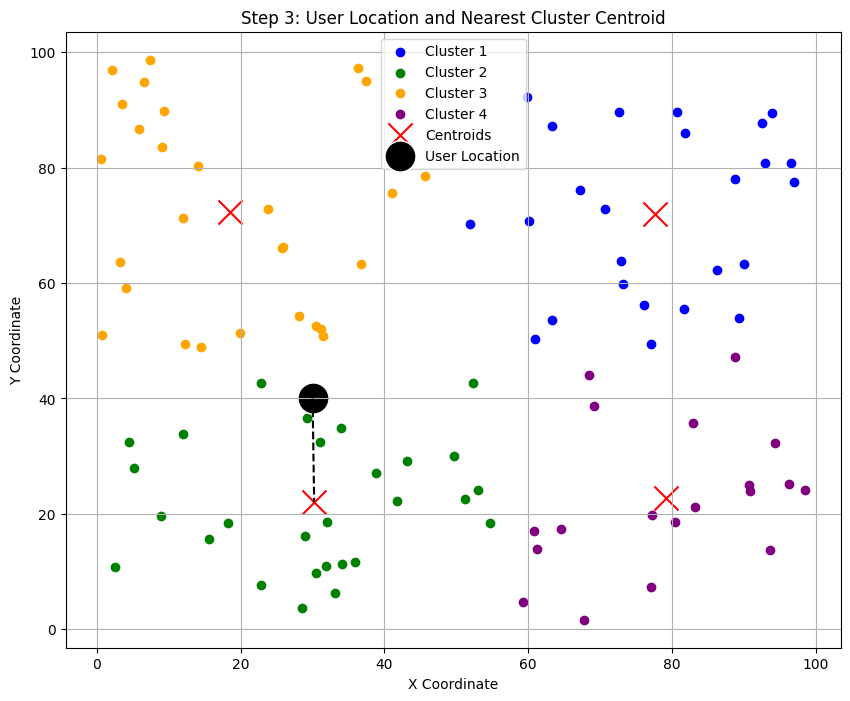

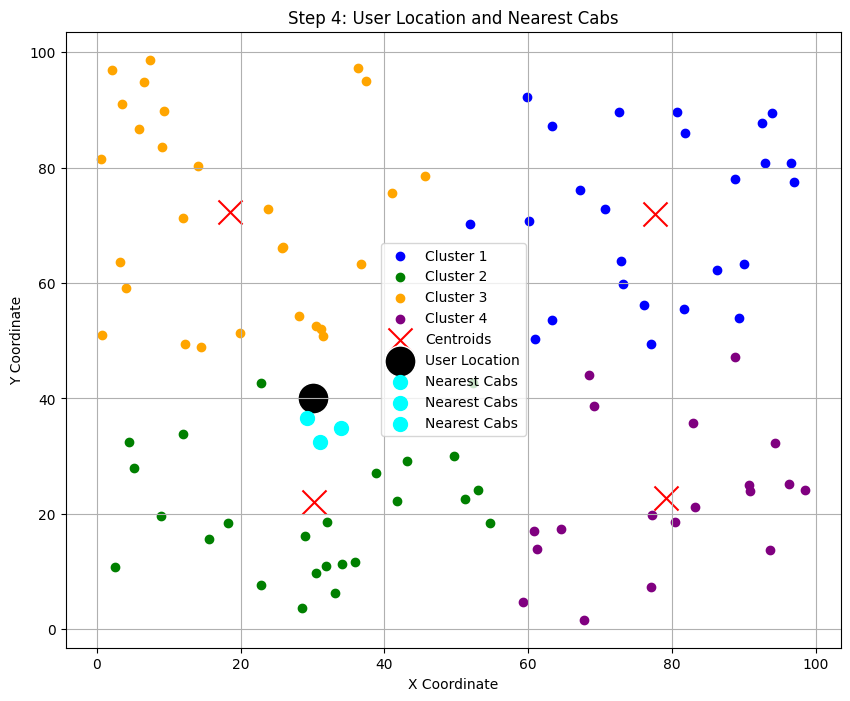

In [29]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Assuming cab_locations, labels, colors, centroids have already been defined from previous code

# Step 5: Consider a user point (coordinates can be changed as needed)
user_point = np.array([[30, 40]])  # Example user point

# Step 6: Calculate distances between the user point and each centroid
distances = np.linalg.norm(centroids - user_point, axis=1)
nearest_cluster_index = np.argmin(distances)

# Step 7: Show the nearest cluster in the first graph
plt.figure(figsize=(10, 8))
for i in range(4):
    points_in_cluster = cab_locations[labels == i]
    plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], color=colors[i], label=f"Cluster {i+1}")

# Mark the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, color='red', marker='x', label="Centroids")

# Mark the user point
plt.scatter(user_point[0, 0], user_point[0, 1], s=500, color='black', label="User Location", edgecolor='white')

# Draw a line to the nearest centroid
plt.plot([user_point[0, 0], centroids[nearest_cluster_index, 0]], 
         [user_point[0, 1], centroids[nearest_cluster_index, 1]], 
         color='black', linestyle='--')

plt.title("Step 3: User Location and Nearest Cluster Centroid")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()

# Step 8: Perform KNN to find the nearest cabs in the nearest cluster
nearest_cluster_cabs = cab_locations[labels == nearest_cluster_index]  # Filter cabs in the nearest cluster

knn = NearestNeighbors(n_neighbors=3)  # Find 3 nearest neighbors
knn.fit(nearest_cluster_cabs)  # Fit only on the nearest cluster
nearest_cabs_indices = knn.kneighbors(user_point, return_distance=False).flatten()  # Get indices of nearest cabs

# Step 9: Show the 3 nearest cabs in the second graph
plt.figure(figsize=(10, 8))
for i in range(4):
    points_in_cluster = cab_locations[labels == i]
    plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], color=colors[i], label=f"Cluster {i+1}")

# Mark the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, color='red', marker='x', label="Centroids")

# Mark the user point
plt.scatter(user_point[0, 0], user_point[0, 1], s=500, color='black', label="User Location", edgecolor='white')

# Mark the nearest cabs without images
for idx in nearest_cabs_indices:
    plt.scatter(nearest_cluster_cabs[idx, 0], nearest_cluster_cabs[idx, 1], color='cyan', s=100, label="Nearest Cabs")

plt.title("Step 4: User Location and Nearest Cabs")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()


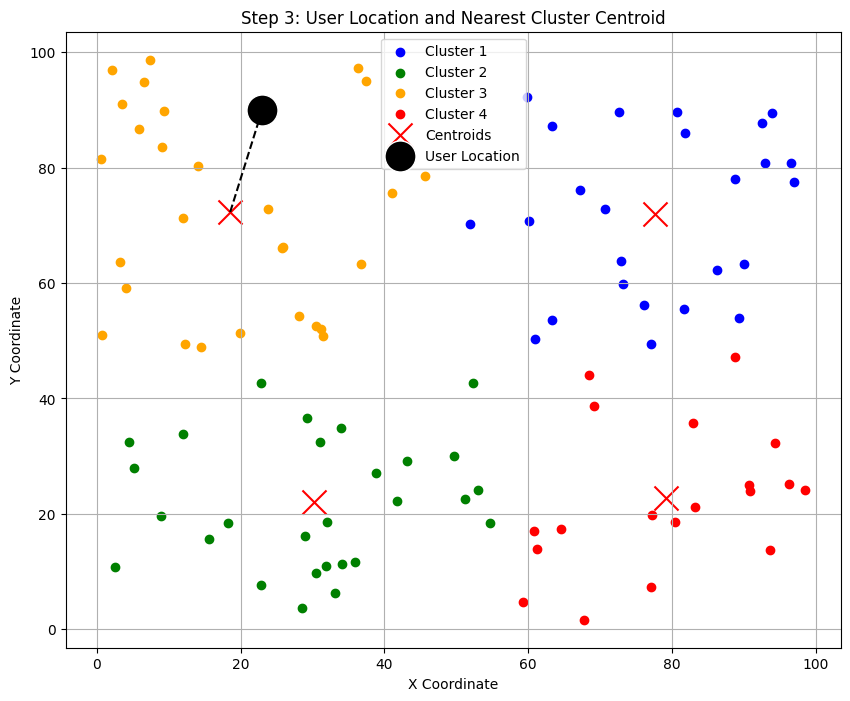

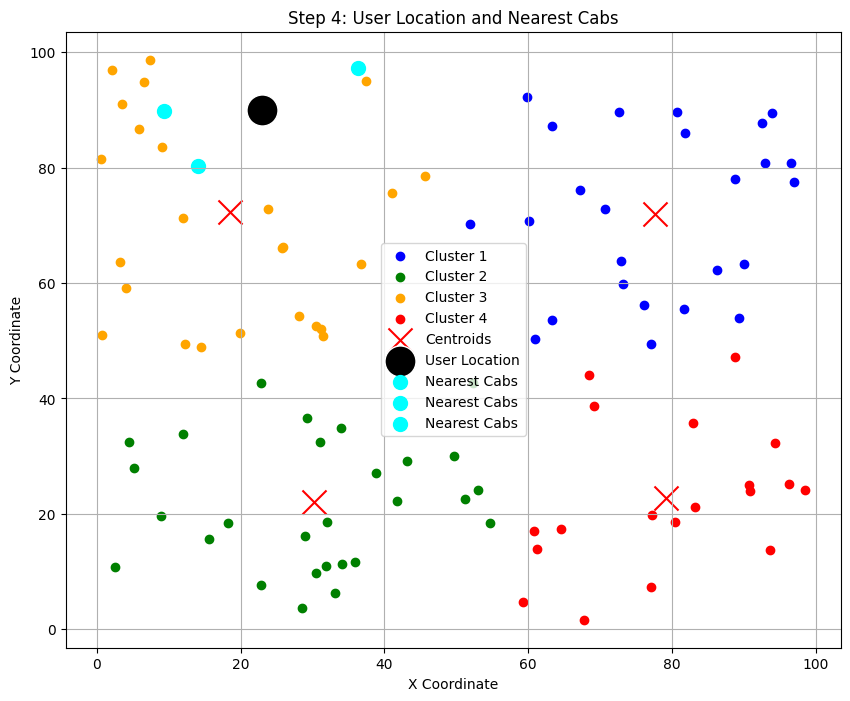

In [53]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Assuming cab_locations, labels, colors, centroids have already been defined from previous code

# Step 5: Consider a user point (coordinates can be changed as needed)
user_point = np.array([[23, 90]])  # Example user point

# Step 6: Calculate distances between the user point and each centroid
distances = np.linalg.norm(centroids - user_point, axis=1)
nearest_cluster_index = np.argmin(distances)

# Step 7: Show the nearest cluster in the first graph
plt.figure(figsize=(10, 8))
for i in range(4):
    points_in_cluster = cab_locations[labels == i]
    plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], color=colors[i], label=f"Cluster {i+1}")

# Mark the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, color='red', marker='x', label="Centroids")

# Mark the user point
plt.scatter(user_point[0, 0], user_point[0, 1], s=500, color='black', label="User Location", edgecolor='white')

# Draw a line to the nearest centroid
plt.plot([user_point[0, 0], centroids[nearest_cluster_index, 0]], 
         [user_point[0, 1], centroids[nearest_cluster_index, 1]], 
         color='black', linestyle='--')

plt.title("Step 3: User Location and Nearest Cluster Centroid")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()

# Step 8: Perform KNN to find the nearest cabs in the nearest cluster
nearest_cluster_cabs = cab_locations[labels == nearest_cluster_index]  # Filter cabs in the nearest cluster

knn = NearestNeighbors(n_neighbors=3)  # Find 3 nearest neighbors
knn.fit(nearest_cluster_cabs)  # Fit only on the nearest cluster
nearest_cabs_indices = knn.kneighbors(user_point, return_distance=False).flatten()  # Get indices of nearest cabs

# Step 9: Show the 3 nearest cabs in the second graph
plt.figure(figsize=(10, 8))
for i in range(4):
    points_in_cluster = cab_locations[labels == i]
    plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], color=colors[i], label=f"Cluster {i+1}")

# Mark the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, color='red', marker='x', label="Centroids")

# Mark the user point
plt.scatter(user_point[0, 0], user_point[0, 1], s=500, color='black', label="User Location", edgecolor='white')

# Mark the nearest cabs without images
for idx in nearest_cabs_indices:
    plt.scatter(nearest_cluster_cabs[idx, 0], nearest_cluster_cabs[idx, 1], color='cyan', s=100, label="Nearest Cabs")

plt.title("Step 4: User Location and Nearest Cabs")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()


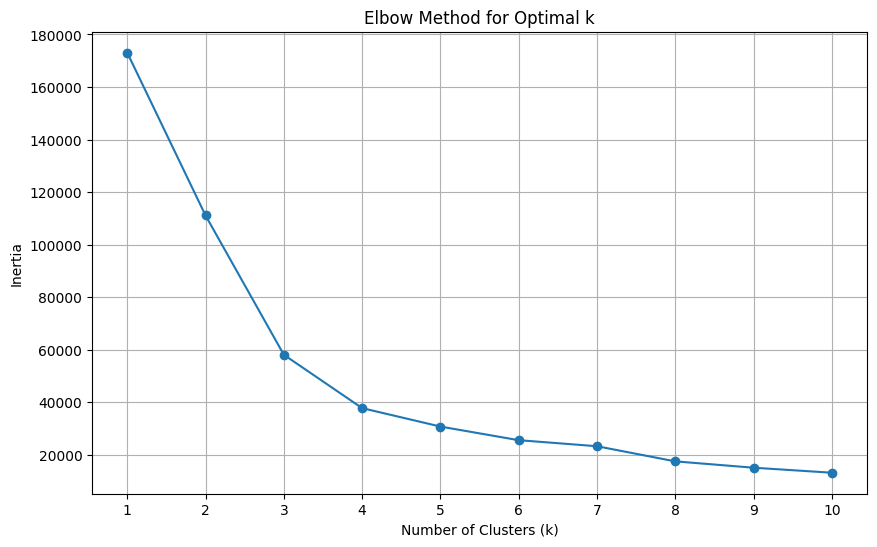

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming cab_locations is already defined as your data points

# Step 1: Define a range for k
k_values = range(1, 11)  # You can adjust the range as needed
inertia = []

# Step 2: Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cab_locations)  # Fit the model
    inertia.append(kmeans.inertia_)  # Store the inertia value

# Step 3: Plot inertia vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.xticks(k_values)  # Set x-ticks to show each k value
plt.show()


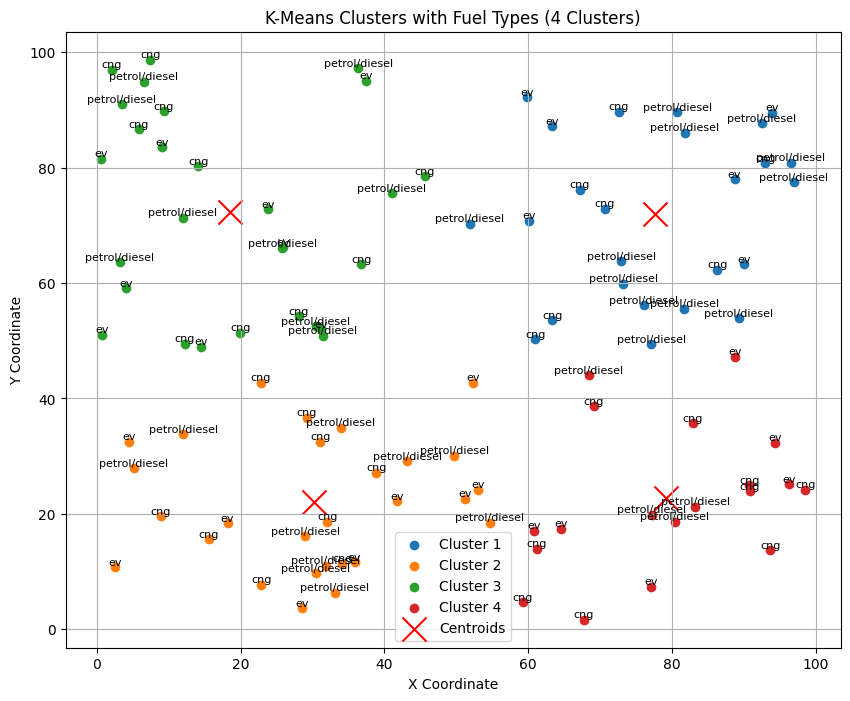

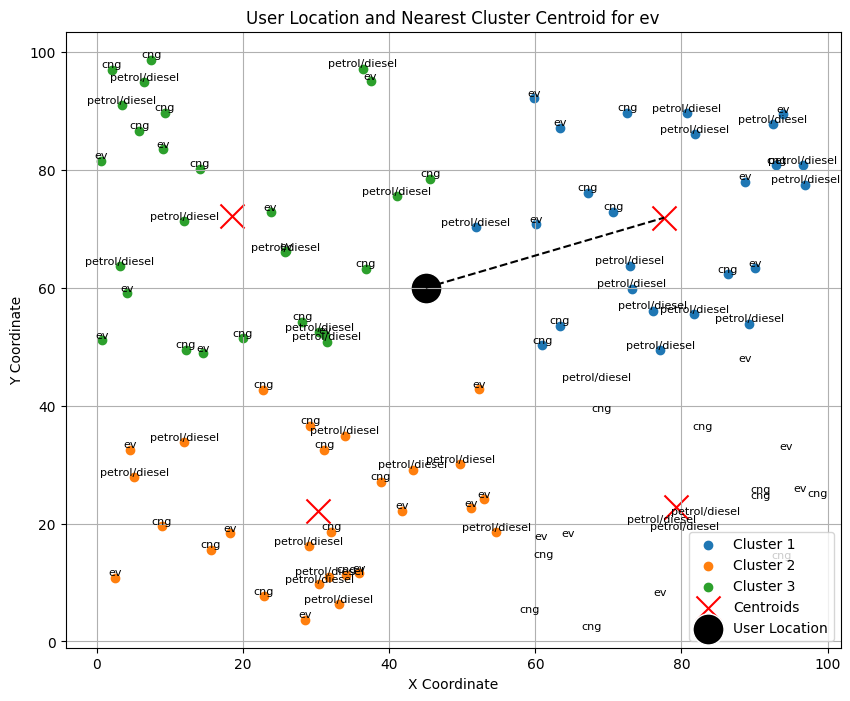

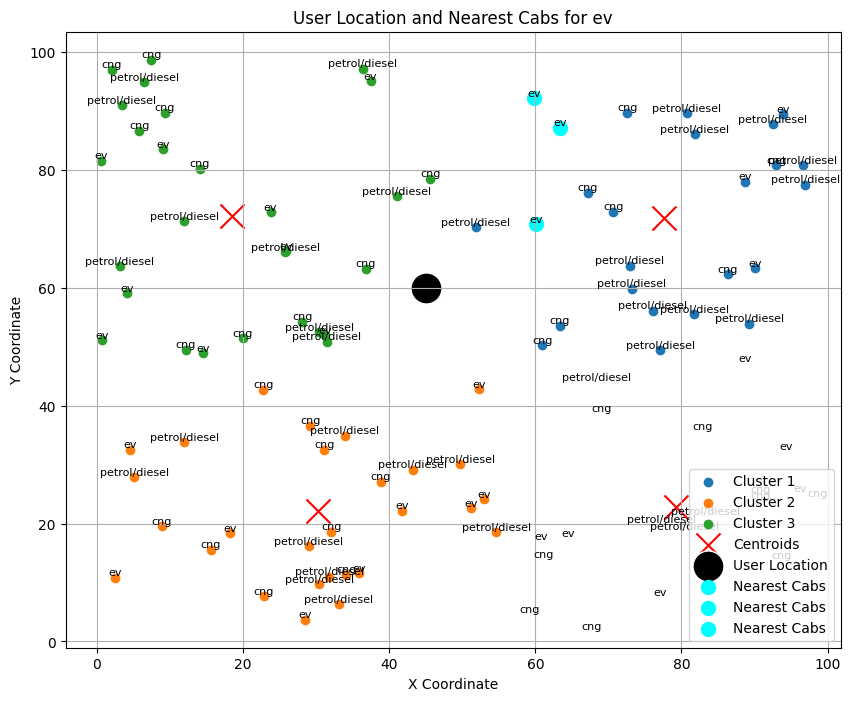

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

# Step 1: Generate random cab locations
np.random.seed(42)
n_cabs = 100
cab_locations = np.random.rand(n_cabs, 2) * 100  # Random (x, y) points between 0 and 100

# Step 2: Assign random fuel types to each cab
fuel_types = np.random.choice(['petrol/diesel', 'cng', 'ev'], size=n_cabs)

# Step 3: Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42)  # Set number of clusters to 3
kmeans.fit(cab_locations)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 4: Plot cab locations with fuel type labels
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.scatter(cab_locations[labels == i][:, 0], 
                cab_locations[labels == i][:, 1], 
                label=f"Cluster {i + 1}")

# Plot the centroids as red "X" markers
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, color='red', marker='x', label="Centroids")

# Adding fuel type labels to the points
for i, (x, y) in enumerate(cab_locations):
    plt.text(x, y, fuel_types[i], fontsize=8, ha='center', va='bottom')

# Final Plotting for K-Means result
plt.title("K-Means Clusters with Fuel Types (4 Clusters)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Simulate user fuel type selection
user_fuel_type = 'ev'  # Example fuel type selected by the user
user_point = np.array([[45, 60]])  # Example user point

# Step 6: Filter cabs by user-selected fuel type
filtered_cabs = cab_locations[fuel_types == user_fuel_type]
filtered_labels = labels[fuel_types == user_fuel_type]

# Step 7: Calculate distances between the user point and centroids of filtered cabs
filtered_centroids = centroids[filtered_labels]
distances = np.linalg.norm(filtered_centroids - user_point, axis=1)
nearest_cluster_index = np.argmin(distances)

# Step 8: Show the nearest cluster of selected fuel type
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(cab_locations[labels == i][:, 0], 
                cab_locations[labels == i][:, 1], 
                label=f"Cluster {i + 1}")

# Mark the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, color='red', marker='x', label="Centroids")

# Mark the user point
plt.scatter(user_point[0, 0], user_point[0, 1], s=500, color='black', label="User Location", edgecolor='white')

# Draw a line to the nearest centroid of selected fuel type
plt.plot([user_point[0, 0], centroids[nearest_cluster_index, 0]],
         [user_point[0, 1], centroids[nearest_cluster_index, 1]],
         color='black', linestyle='--')
for i, (x, y) in enumerate(cab_locations):
    plt.text(x, y, fuel_types[i], fontsize=8, ha='center', va='bottom')
plt.title(f"User Location and Nearest Cluster Centroid for {user_fuel_type}")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()

# Step 9: Perform KNN to find the nearest cabs of the selected fuel type in the nearest cluster
nearest_cluster_cabs = filtered_cabs[filtered_labels == nearest_cluster_index]  # Filter cabs in the nearest cluster of the selected fuel type

knn = NearestNeighbors(n_neighbors=3, metric= "manhattan")  # Find 3 nearest neighbors
knn.fit(nearest_cluster_cabs)  # Fit only on the nearest cluster
nearest_cabs_indices = knn.kneighbors(user_point, return_distance=False).flatten()  # Get indices of nearest cabs

# Step 10: Show the 3 nearest cabs in the second graph
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(cab_locations[labels == i][:, 0], 
                cab_locations[labels == i][:, 1], 
                label=f"Cluster {i + 1}")

# Mark the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, color='red', marker='x', label="Centroids")

# Mark the user point
plt.scatter(user_point[0, 0], user_point[0, 1], s=500, color='black', label="User Location", edgecolor='white')

# Mark the nearest cabs of selected fuel type
for idx in nearest_cabs_indices:
    plt.scatter(nearest_cluster_cabs[idx, 0], nearest_cluster_cabs[idx, 1], color='cyan', s=100, label="Nearest Cabs")
for i, (x, y) in enumerate(cab_locations):
    plt.text(x, y, fuel_types[i], fontsize=8, ha='center', va='bottom')
plt.title(f"User Location and Nearest Cabs for {user_fuel_type}")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()


In [58]:
from sklearn.metrics import silhouette_score

# Step 1: Calculate the Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(cab_locations, labels)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")


Silhouette Score for K-Means: 0.4345487370710211
